In [42]:
import kex_data
import filefit
import importlib
importlib.reload(filefit)
import e7tools
importlib.reload(e7tools)
import os
import volume_view
import visual

In [43]:
izoom_dir = r"C:/Users/petct/Desktop/Hugo/Code/PythonMEX/izoom"
filefit.prep_folder(izoom_dir, [])
mhdrs = kex_data.get_sino_mainhdrs()
decay_ref_times = kex_data.RECON_DCR
norm = kex_data.NORM_PATH

In [44]:
for (mhdr, dcr) in zip(mhdrs, decay_ref_times):
    output = filefit.refolder_path(izoom_dir, mhdr)
    print("returncode", e7tools.kex_recon(mhdr, norm, output, verbose=False, dcr=dcr, izoom=2)) #izoom 1 by default

stdout
 b''
stderr
 b''
returncode 0
stdout
 b''
stderr
 b''
returncode 0
stdout
 b''
stderr
 b''
returncode 0
stdout
 b''
stderr
 b''
returncode 0


In [45]:
v_paths = []
with os.scandir(izoom_dir) as it:
    for entry in it:
        if entry.name.endswith(".v"):
            v_paths.append(izoom_dir+"/"+entry.name)
print(v_paths)

['C:/Users/petct/Desktop/Hugo/Code/PythonMEX/no_izoom/CylinderPET-LM-00-sino_000_000.v', 'C:/Users/petct/Desktop/Hugo/Code/PythonMEX/no_izoom/CylinderPET-LM-01-sino_000_000.v', 'C:/Users/petct/Desktop/Hugo/Code/PythonMEX/no_izoom/KanylPET-LM-00-sino_000_000.v', 'C:/Users/petct/Desktop/Hugo/Code/PythonMEX/no_izoom/KanylPET-LM-01-sino_000_000.v']


In [46]:
images = [filefit.get_v_data(path) for path in v_paths]

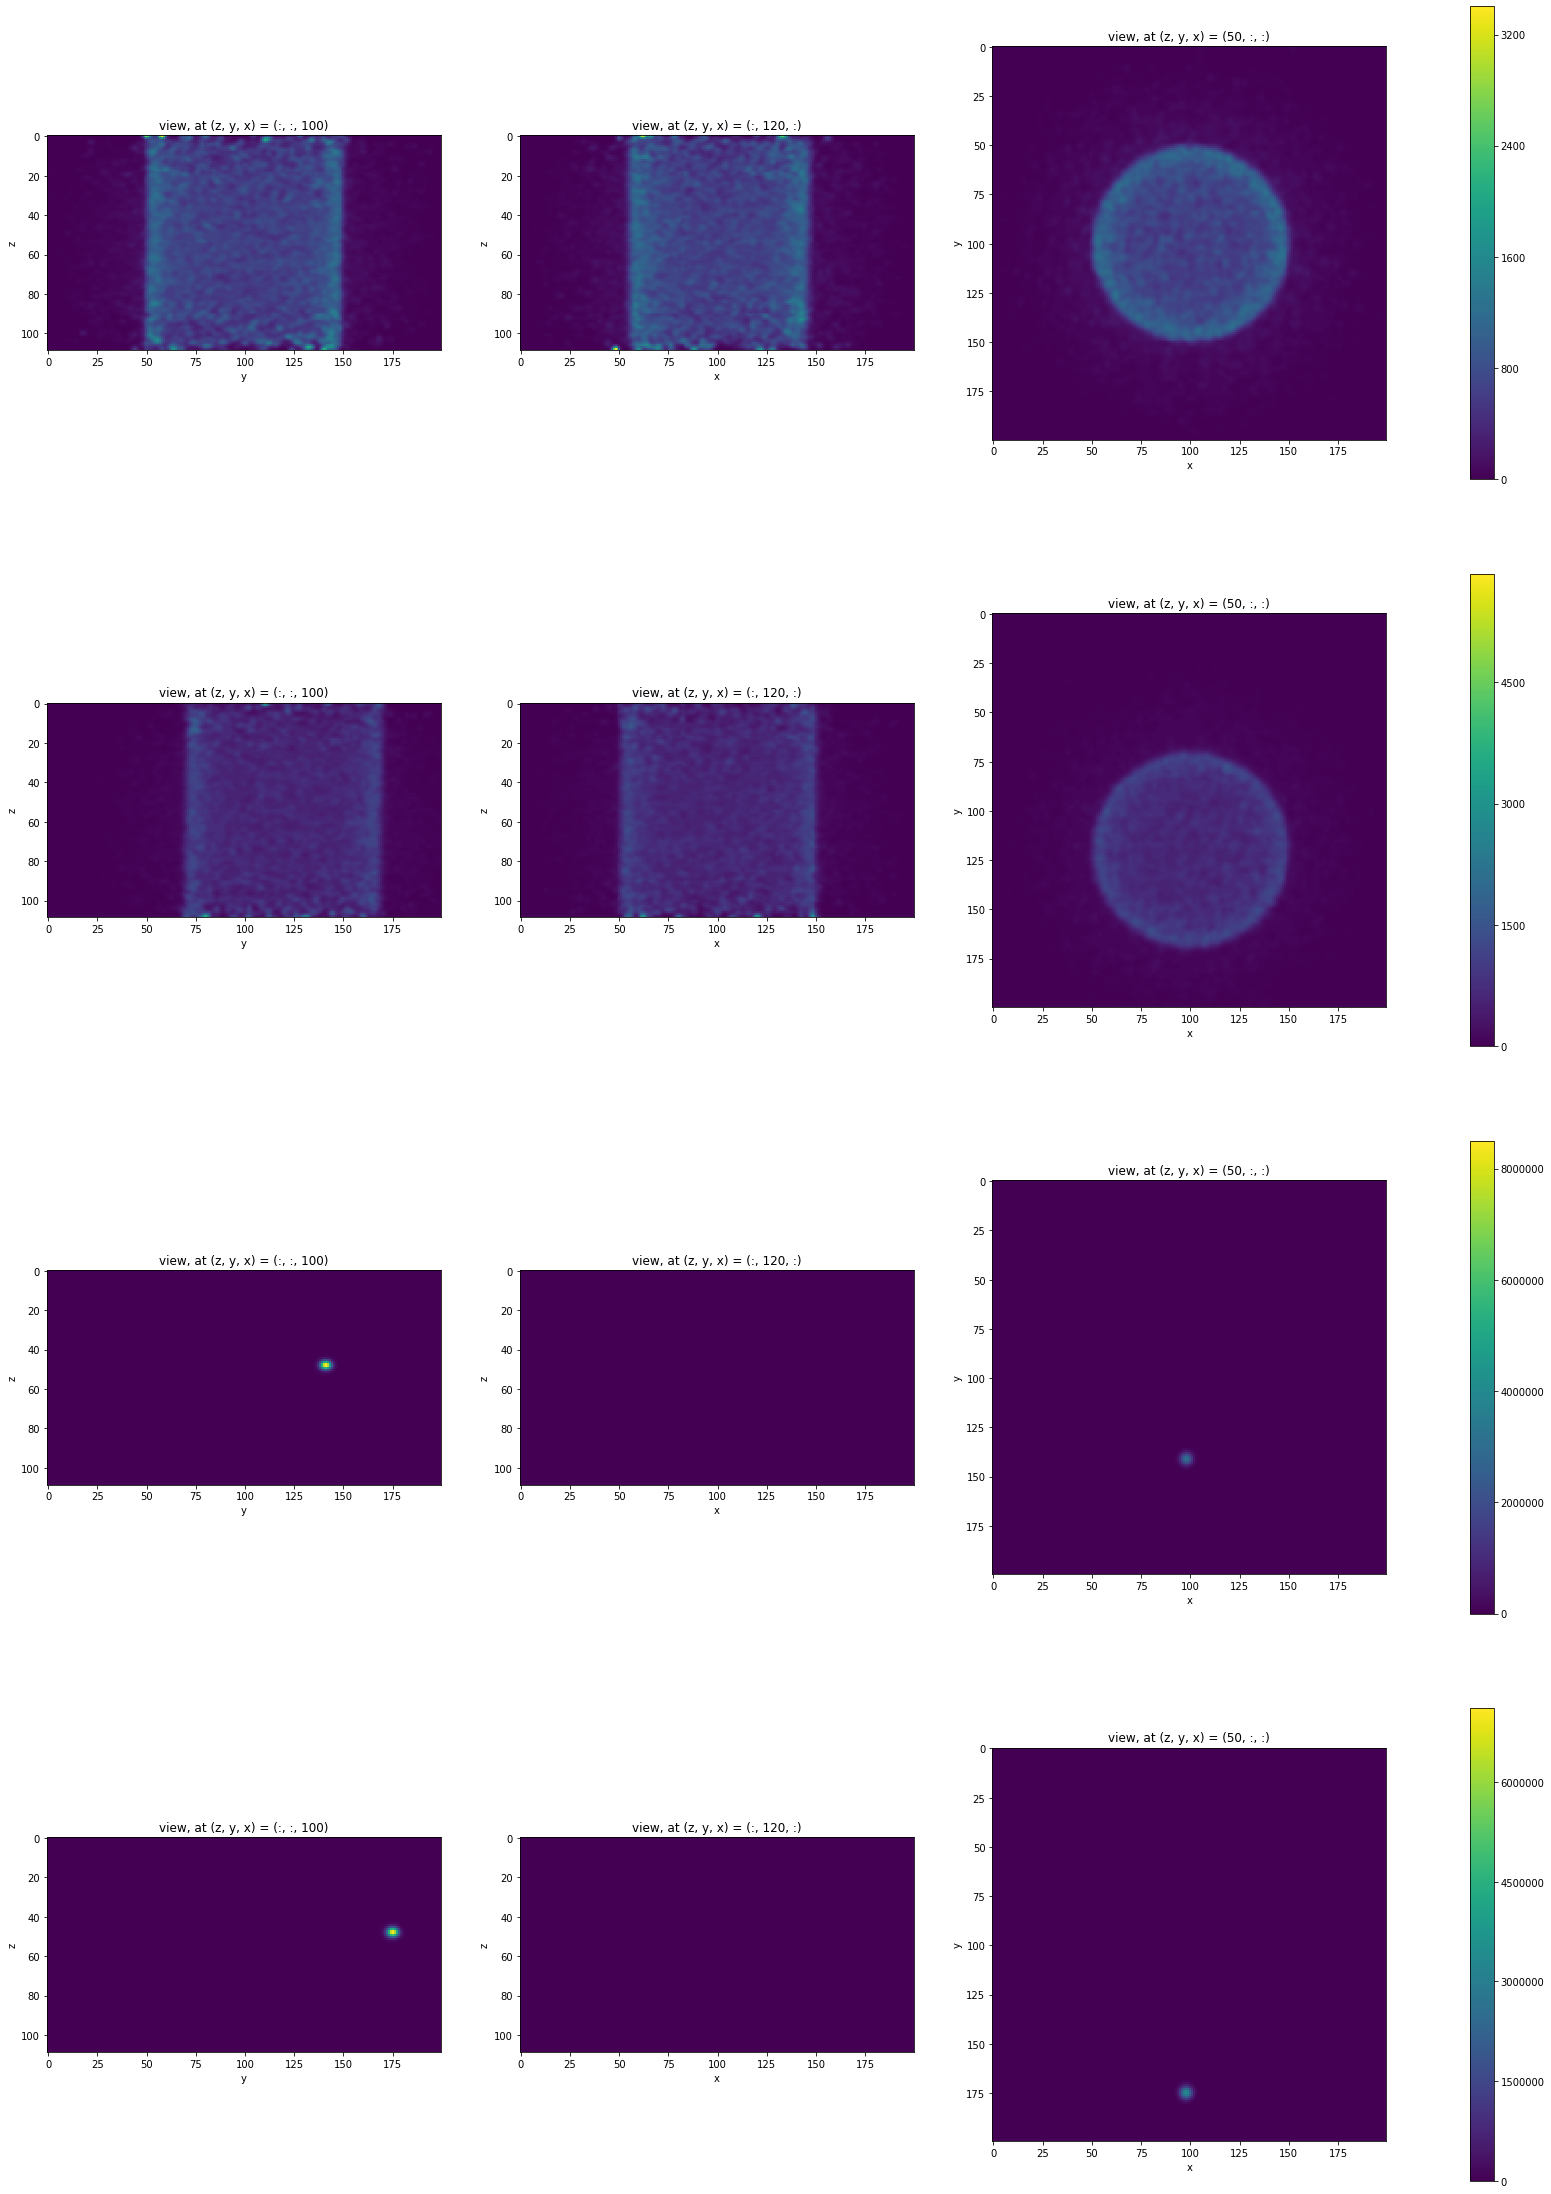

In [47]:
fig, axes = volume_view.setup_fig_axes(images)

for image, axrow in zip(images, axes):
    position = [50, 120, 100]
    ims = volume_view.plot_views(image, position, axes=axrow, dimlabels='zyx')
    visual.same_colorbar(fig, ims, axrow)